In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

In [2]:
with open('primitive_length.pkl', 'rb') as f:
    L = pickle.load(f)
f.close()

with open('ou_noise_log_gamma.pkl', 'rb') as f:
    switch_list = pickle.load(f)
f.close()
print(L)
print(switch_list)

[ 1  3  5  7  9 11 13 15 17 19 20 30 40 50 60 70 80 90]
[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8. ]


F_Ciff = 1 - r =  0.9986421621201202
A =  0.7105755457102759


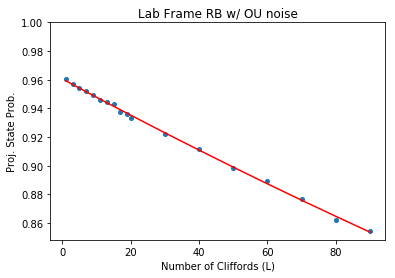

[0.96027797 0.9568012  0.95419676 0.95213153 0.94958345 0.9455163
 0.94422509 0.942906   0.93770455 0.9361113  0.93329529 0.92246374
 0.91194145 0.89843926 0.88931303 0.87650098 0.86244568 0.85448061]
[0.7102779696744999, 0.7068012017768986, 0.7041967573551844, 0.7021315328425003, 0.6995834531782291, 0.695516301080194, 0.6942250862698197, 0.6929060019067524, 0.6877045460848539, 0.6861113030194235, 0.6832952852672776, 0.6724637391110291, 0.6619414543519433, 0.6484392568093255, 0.6393130332704343, 0.6265009829634837, 0.612445681854219, 0.6044806050800156]
F_Ciff = 1 - r =  0.9986555345372611
A =  0.7103819189482642


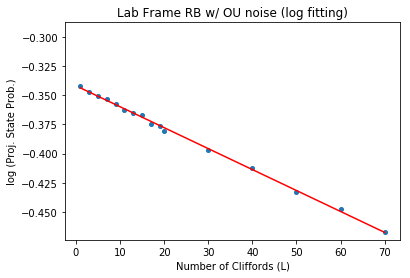

In [3]:
with open('20.pkl', 'rb') as f:
    data = pickle.load(f)
f.close()

y = data[1]
###############
# SRB with fixed B

def func(x, A, r):
    return  A * (1 - 4/3*r)**x + 0.25

popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
print("F_Ciff = 1 - r = ", 1 - popt[1])
print("A = ", popt[0])

plt.plot(L, y, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ OU noise")
plt.show()

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

y_fit = [p - 0.25 for p in y]
print(y)
print(y_fit)
y_fit = np.log(np.absolute(y_fit))
L = L[0:16]
y_fit = y_fit[0:16]
popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
r = 3/4 * (1 - np.exp(popt[1]))
print("F_Ciff = 1 - r = ", 1 - r)
print("A = ", np.exp(popt[0]))

plt.plot(L, y_fit, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=np.log(0.75))
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("log (Proj. State Prob.)")
plt.title("Lab Frame RB w/ OU noise (log fitting)")
plt.show()

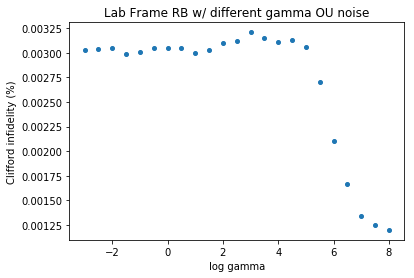

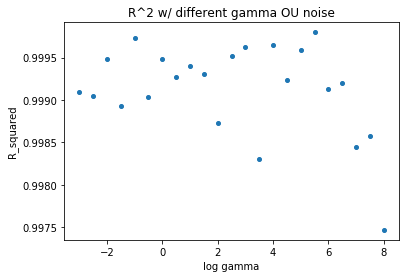

In [5]:
###############
# SRB with fixed B

# def func(x, A, r):
#     return  A * (1 - 4/3*r)**x + 0.25

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

F_Clifford = np.zeros(len(switch_list))
r_sqrd = np.zeros(len(switch_list))

for i in range(len(switch_list)):
    with open(str(i) + '.pkl', 'rb') as f:
        data = pickle.load(f)
    f.close()
    
    noise_index = data[0]
    y = data[1]
    
    ###############
    # SRB with fixed B
#     popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
#     F_Clifford[i] = popt[1] * 100
    
    ###############
    # Fixed constant term with logarithm
    y_fit = [p - 0.25 for p in y]
    y_fit = np.log(np.absolute(y_fit))
    L = L[0:16]
    y_fit = y_fit[0:16]
    popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
    F_Clifford[i] = 3/4 * (1 - np.exp(popt[1]))
    residuals = y_fit - func(L, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
    r_sqrd[i] = 1 - (ss_res/ss_tot)

plot1 = plt.figure(1)
plt.plot(switch_list, F_Clifford, 'o', markersize=4)
plt.xlabel("log gamma")
plt.ylabel("Clifford infidelity (%)")
plt.title("Lab Frame RB w/ different gamma OU noise")
plt.show()

plot2 = plt.figure(2)
plt.plot(switch_list, r_sqrd, 'o', markersize=4)
plt.xlabel("log gamma")
plt.ylabel("R_squared")
plt.title("R^2 w/ different gamma OU noise")
plt.show()